In [2]:
import tensorflow as tf
import cv2
import PIL.Image as Image
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [3]:
IMAGE_SHAPE = (224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=IMAGE_SHAPE+(3,))
])

In [4]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [5]:
ros = Image.open('ros.jpg').resize(IMAGE_SHAPE)

In [6]:
ros =np.array(ros)/255.0
ros

array([[[0.91764706, 0.94901961, 0.85882353],
        [0.91372549, 0.95294118, 0.90980392],
        [0.90980392, 0.97647059, 0.87058824],
        ...,
        [0.48627451, 0.22352941, 0.28235294],
        [0.58039216, 0.23529412, 0.33333333],
        [0.4745098 , 0.20392157, 0.36862745]],

       [[0.94901961, 0.97647059, 0.90196078],
        [0.9372549 , 0.98039216, 0.94117647],
        [0.92941176, 0.98823529, 0.89803922],
        ...,
        [0.3254902 , 0.07058824, 0.18039216],
        [0.48627451, 0.14509804, 0.21568627],
        [0.51764706, 0.21960784, 0.37647059]],

       [[0.94509804, 0.97254902, 0.90980392],
        [0.94509804, 0.98039216, 0.93333333],
        [0.92941176, 0.98039216, 0.90196078],
        ...,
        [0.29411765, 0.05882353, 0.20784314],
        [0.48627451, 0.16470588, 0.21176471],
        [0.52941176, 0.22352941, 0.35686275]],

       ...,

       [[0.29803922, 0.28627451, 0.13333333],
        [0.28235294, 0.25882353, 0.15686275],
        [0.3372549 , 0

In [7]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [8]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [9]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [10]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [11]:
flowers_images_dict['tulips']

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10164073235_f29931d91e.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10686568196_b1915544a8.jpg'),
 WindowsPath('datasets/flower_photos/tulips/107693873_86021ac4ea_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10791227_7168491604.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10995953955_089572caf0.jpg'),
 WindowsPath('datasets/flower_photos/tulips/110147301_ad921e2828.jpg'),
 WindowsPath('datasets/flower_photos/tulips/112334842_3ecf7585dd.jpg'),
 WindowsPath('datasets/flower_photos/tulips/112428665_d8f3632f36_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips

In [12]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [13]:
X = []
Y = []
for flower_name,img in flowers_images_dict.items():
    for image in img:
        img = cv2.imread(str(image))
        resized_img =cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_img)
        Y.append(flowers_labels_dict[flower_name])

In [14]:
X[0]

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 16,  7],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 8, 22, 14],
        [ 8, 22, 14],
        [ 7, 21, 14],
        ...,
        [21, 47, 31],
        [24, 49, 34],
        [25, 51, 35]],

       [[12, 22, 15],
        [12, 22, 15],
        [11, 22, 14],
        ...,
        [21, 43, 31],
        [24, 46, 33],
        [26, 48, 36]],

       ...,

       [[17, 29, 25],
        [14, 25, 20],
        [13, 22, 15],
        ...,
        [ 2, 11,  2],
        [ 0,  7,  1],
        [ 0,  4,  0]],

       [[19, 30, 28],
        [18, 28, 25],
        [16, 25, 19],
        ...,
        [ 2, 10,  2],
        [ 1,  8,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [15, 23, 22],
        [19, 27, 24],
        ...,
        [ 1, 11,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [15]:
Y[0]

0

In [16]:
X = np.array(X)
Y = np.array(Y)

In [17]:
X = X/255.0

In [18]:
X[0]

array([[[0.        , 0.05882353, 0.02352941],
        [0.        , 0.05882353, 0.02352941],
        [0.        , 0.0627451 , 0.02745098],
        ...,
        [0.09411765, 0.2       , 0.12156863],
        [0.09803922, 0.20392157, 0.1254902 ],
        [0.10196078, 0.20784314, 0.12941176]],

       [[0.03137255, 0.08627451, 0.05490196],
        [0.03137255, 0.08627451, 0.05490196],
        [0.02745098, 0.08235294, 0.05490196],
        ...,
        [0.08235294, 0.18431373, 0.12156863],
        [0.09411765, 0.19215686, 0.13333333],
        [0.09803922, 0.2       , 0.1372549 ]],

       [[0.04705882, 0.08627451, 0.05882353],
        [0.04705882, 0.08627451, 0.05882353],
        [0.04313725, 0.08627451, 0.05490196],
        ...,
        [0.08235294, 0.16862745, 0.12156863],
        [0.09411765, 0.18039216, 0.12941176],
        [0.10196078, 0.18823529, 0.14117647]],

       ...,

       [[0.06666667, 0.11372549, 0.09803922],
        [0.05490196, 0.09803922, 0.07843137],
        [0.05098039, 0

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state=0)

In [20]:
len(X_train)+len(X_test)

3670

In [21]:
len(X)

3670

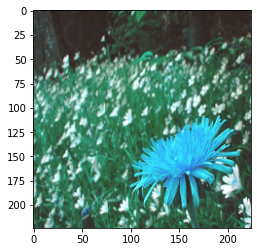

In [22]:
plt.imshow(X_train[0])

In [23]:
X_train[0].shape

(224, 224, 3)

In [24]:
X[0].shape

(224, 224, 3)

In [25]:
classifier.predict(np.array([X[0],X[1],X[2]]))

UnimplementedError: Graph execution error:

Detected at node 'predict/MobilenetV2/Conv/Conv2D' defined at (most recent call last):
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2898, in run_cell
      result = self._run_cell(
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2944, in _run_cell
      return runner(coro)
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3169, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3361, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\pv502\AppData\Local\Temp/ipykernel_12476/4149811195.py", line 3, in <module>
      hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=IMAGE_SHAPE+(3,))
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow_hub\keras_layer.py", line 153, in __init__
      self._func = load_module(handle, tags, self._load_options)
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow_hub\keras_layer.py", line 449, in load_module
      return module_v2.load(handle, tags=tags, options=set_load_options)
    File "C:\Users\pv502\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow_hub\module_v2.py", line 106, in load
      obj = tf.compat.v1.saved_model.load_v2(module_path, tags=tags)
Node: 'predict/MobilenetV2/Conv/Conv2D'
DNN library is not found.
	 [[{{node predict/MobilenetV2/Conv/Conv2D}}]] [Op:__inference_predict_function_9806]

In [ ]:
feature_extraction_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extraction_model,input_shape=(224,224,3),trainable=False
)

In [ ]:
X_train[0]

In [ ]:
Y_train[0]

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train,Y_train,epochs=5)

In [ ]:
X_test[0]

In [ ]:
len(X_test)

In [ ]:
len(Y_test)

In [ ]:
model.evaluate(X_test,Y_test)